In [1]:
%matplotlib inline
import io
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
datafile_AMT = '../data/MTurk_anonymous.xlsx'
datafile_DTU1 = '../data/DTU1_anonymous.xlsx'
datafile_DTU2 = '../data/DTU2_anonymous.xlsx'

Load the data into three dataframes:

In [3]:
df_MTurk = pd.DataFrame(pd.read_excel(datafile_AMT))
df_MTurk.drop(df_MTurk.columns[df_MTurk.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_DTU1 = pd.DataFrame(pd.read_excel(datafile_DTU1))
df_DTU1.drop(df_DTU1.columns[df_DTU1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_DTU2 = pd.DataFrame(pd.read_excel(datafile_DTU2))
df_DTU2.drop(df_DTU2.columns[df_DTU2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
df_MTurk.head()

,session,code,group,id_in_group,round,arrival,choice,certainty,bonus,strategy,simple,cutoff,fault,payoff
0,0c0pdasz,zh74wr23,2,1,1,8.2,1,0.875,-0.13,NaN,NaN,NaN,NaN,7.89
1,0c0pdasz,w73mxa5y,2,2,1,8.3,1,0.875,-0.13,NaN,NaN,NaN,NaN,4.66
2,0c0pdasz,zh74wr23,2,1,2,8.2,0,0.500,-1.39,NaN,NaN,NaN,NaN,7.89
3,0c0pdasz,w73mxa5y,2,2,2,8.1,1,0.875,-4.16,NaN,NaN,NaN,NaN,4.66
4,0c0pdasz,zh74wr23,2,1,3,8.2,1,0.990,-0.01,NaN,NaN,NaN,NaN,7.89


In [5]:
dfm = df_MTurk[['arrival', 'choice']]
dfd1 = df_DTU1[['arrival', 'choice']]
dfd2 = df_DTU2[['arrival', 'choice']]
len(dfm), len(dfd1), len(dfd2)

(4260, 2160, 1012)

Replace arrival times so that they are equidistant numbers and counted in minutes from 8am:

In [6]:
dfm['arrival'].replace({9.0: 8.6, 9.1: 8.7}, inplace=True)
dfm['arrival'] = dfm['arrival'] - 8
dfm['arrival'] = dfm['arrival'] * 100
dfd1['arrival'].replace({9.0: 8.6, 9.1: 8.7}, inplace=True)
dfd1['arrival'] = dfd1['arrival'] - 8
dfd1['arrival'] = dfd1['arrival'] * 100
dfd2['arrival'].replace({9.0: 8.6, 9.1: 8.7}, inplace=True)
dfd2['arrival'] = dfd2['arrival'] - 8
dfd2['arrival'] = dfd2['arrival'] * 100

c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In order to make multiple regressions in one plot, we need to concatenate the dataframes and use seaborns FacetGrid function:

In [7]:
df = pd.concat([dfm.join(pd.Series(['dfm']*len(dfm), name='group')), 
                dfd1.join(pd.Series(['dfd1']*len(dfd1), name='group')),
                dfd2.join(pd.Series(['dfd2']*len(dfd2), name='group'))],
                ignore_index=True)
df.head()
len(df)

7432

The logistic regression takes longer time with confidence intervals due to the bootstrapping. Set n_boot to 10000 for the final plot.

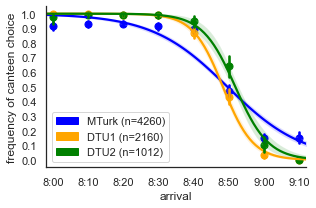

In [8]:
pal = dict(dfm="blue", dfd1="orange", dfd2="green")
g = sns.lmplot(x="arrival", y="choice", hue="group", data=df, palette=pal, 
               logistic=True, ci=95, n_boot=10000, x_estimator=np.mean, x_ci="ci",
               y_jitter=.2, legend=False, height=3, aspect=1.5)

#plt.setp(g.lines, alpha=1) # setting translucency of CI to zero
g.set(xlim=(-2, 72))
g.set(ylabel='frequency of canteen choice')
g.set(xticks=[0,10,20,30,40,50,60,70], yticks=[0, .1,.2,.3,.4,.5,.6,.7,.8,.9, 1])
g.set(xticklabels = ["8:00", "8:10", "8:20", "8:30", "8:40", "8:50", "9:00", "9:10"])

# make my own legend:
name_to_color = {
    'MTurk (n=4260)': 'blue',
    'DTU1  (n=2160)': 'orange',
    'DTU2  (n=1012)': 'green',
}
patches = [patch.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc='lower left')
plt.tight_layout()

plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig1_logit.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'fig1_logit.pdf'), transparent=True, dpi=300)
sns.despine()